In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\hp\Downloads\chocolate.csv")

In [5]:
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [6]:
#exploring the dataframe to understand what it contains
df.describe()

,ref,review_date,rating
count,2530.000000,2530.000000,2530.000000
mean,1429.800791,2014.374308,3.196344
std,757.648556,3.968267,0.445321
min,5.000000,2006.000000,1.000000
25%,802.000000,2012.000000,3.000000
50%,1454.000000,2015.000000,3.250000
75%,2079.000000,2018.000000,3.500000
max,2712.000000,2021.000000,4.000000


In [7]:
#numerical values appear to be date and rating, the ref column might not hold much information as it migh
df.dtypes

ref                                   int64
company_manufacturer                 object
company_location                     object
review_date                           int64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                        object
ingredients                          object
most_memorable_characteristics       object
rating                              float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2530 non-null   int64  
 1   company_manufacturer              2530 non-null   object 
 2   company_location                  2530 non-null   object 
 3   review_date                       2530 non-null   int64  
 4   country_of_bean_origin            2530 non-null   object 
 5   specific_bean_origin_or_bar_name  2530 non-null   object 
 6   cocoa_percent                     2530 non-null   object 
 7   ingredients                       2443 non-null   object 
 8   most_memorable_characteristics    2530 non-null   object 
 9   rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


In [9]:
df.shape

(2530, 10)

In [10]:
#checking the df to see whether it contains duplicate entry
df.duplicated().sum()

0

In [52]:
#checking the df for missing or null values
df.isnull().sum()

ref                                  0
company_manufacturer                 0
company_location                     0
review_date                          0
country_of_bean_origin               0
specific_bean_origin_or_bar_name     0
cocoa_percent                        0
ingredients                         87
most_memorable_characteristics       0
rating                               0
dtype: int64

In [12]:
#Which country has the highest number of choclate manufacturers 
top10c = df.company_location.value_counts().head(10)
print(top10c)

company_location
U.S.A.         1136
Canada          177
France          176
U.K.            133
Italy            78
Belgium          63
Ecuador          58
Australia        53
Switzerland      44
Germany          42
Name: count, dtype: int64


In [59]:
#what are the most popular company in the U.S.A
usa = df[df.company_location.isin(['U.S.A.'])]
usa.company_manufacturer.value_counts().head(10)

company_manufacturer
Fresco              39
Arete               32
Dandelion           25
Guittard            22
Dick Taylor         19
Castronovo          19
Mast Brothers       18
Scharffen Berger    17
Rogue               16
Letterpress         15
Name: count, dtype: int64

In [13]:
#what is the average rating of choclate from different countries
country_rating = df.groupby('company_location')['rating'].mean().sort_values(ascending = False).head(10)
country_rating.round(2)

company_location
Chile          3.75
U.A.E.         3.40
Poland         3.38
Vietnam        3.36
Australia      3.36
Guatemala      3.35
Denmark        3.34
Norway         3.33
Switzerland    3.32
Amsterdam      3.31
Name: rating, dtype: float64

In [37]:
#what is the most popular ingrident
df['ingredients'].value_counts().head(10)

ingredients
3- B,S,C        999
2- B,S          718
4- B,S,C,L      286
5- B,S,C,V,L    184
4- B,S,C,V      141
2- B,S*          31
4- B,S*,C,Sa     20
3- B,S*,C        12
3- B,S,L          8
4- B,S*,C,V       7
Name: count, dtype: int64

In [16]:
#what are the most popular ingridents used in high rated choclate

#check for the highest rating
df.rating.max()
#check for rating => than the highest rating
high_rated = df[df['rating']>=4]
#check for the popular ingridents
high_rated.ingredients.value_counts()


ingredients
3- B,S,C        58
2- B,S          26
4- B,S,C,L      14
5- B,S,C,V,L    11
4- B,S,C,V       2
Name: count, dtype: int64

In [53]:
#Which regions have the highest potential for new market entry?
#identify th countries with few companies but high ratings

#count the company location with most rating
location_counts = df.company_location.value_counts()

#group the companies by their average rating
location_ratings = df.groupby('company_location')['rating'].mean()

# Define the chosen threshold for the number of choclate company present in a country
threshold =10

# identify countries with companies with <= to the set threshold and show their average rating
potential_markets = location_ratings[location_counts[location_counts <= threshold].index].sort_values(ascending=False).head(10)

print(potential_markets.round(2))




company_location
Chile        3.75
U.A.E.       3.40
Poland       3.38
Guatemala    3.35
Norway       3.33
Iceland      3.31
Argentina    3.31
Thailand     3.30
Russia       3.25
Fiji         3.25
Name: rating, dtype: float64


Text(0.5, 0, 'perccentage')

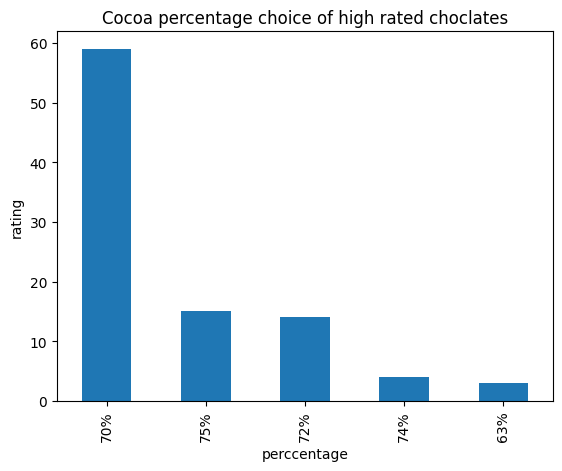

In [48]:
#what are the cocoa percentage for the high rated choclate
high_rated.cocoa_percent.value_counts().head(5).plot(kind = 'bar')
plt.title('Cocoa percentage choice of high rated choclates')
plt.ylabel('rating')
plt.xlabel('perccentage')


<Figure size 1000x600 with 0 Axes>

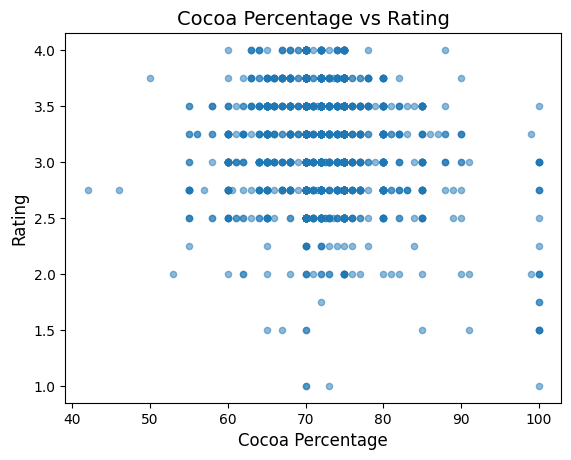

In [23]:

#Is there a correlation between cocoa percentage and consumer ratings?

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Optional: set the figure size for better readability
df.plot.scatter(x='cocoa_percent', y='rating', alpha=0.5)
plt.title('Cocoa Percentage vs Rating', fontsize=14)
plt.xlabel('Cocoa Percentage', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show();


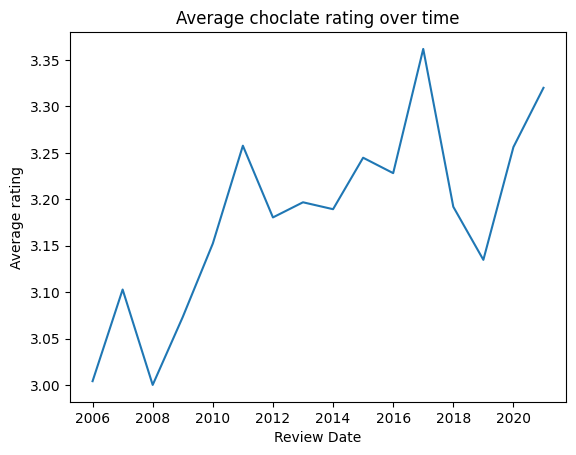

In [25]:
#how is the average choclate rating  overtime 
df.groupby('review_date')['rating'].mean().plot()
plt.title('Average choclate rating over time')
plt.ylabel('Average rating')
plt.xlabel('Review Date');



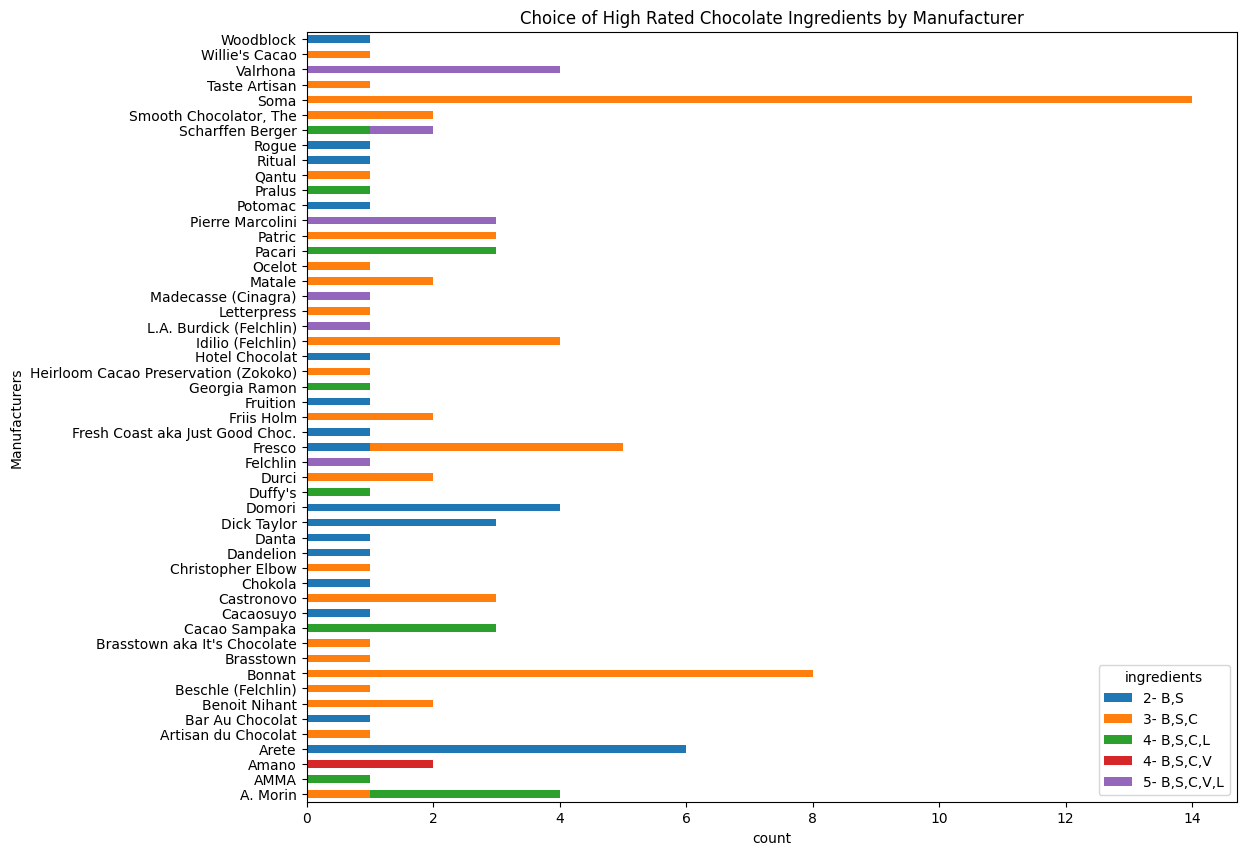

In [33]:
#which high rated ingridents are manufacturers using the most
high_rated.groupby('company_manufacturer')['ingredients'].value_counts().unstack().plot(kind='barh', stacked=True,figsize=(12,10))
plt.title('Choice of High Rated Chocolate Ingredients by Manufacturer')
plt.xlabel('count')
plt.ylabel('Manufacturers')
plt.legend = False
plt.show()



In [36]:
#top 10 countries as a %
percentageC = df.company_location.value_counts(normalize= True).head(10)*100
percentageC

company_location
U.S.A.         44.901186
Canada          6.996047
France          6.956522
U.K.            5.256917
Italy           3.083004
Belgium         2.490119
Ecuador         2.292490
Australia       2.094862
Switzerland     1.739130
Germany         1.660079
Name: proportion, dtype: float64

In [51]:
#what countries did original bean come from the most
df.country_of_bean_origin.value_counts().head(10)

country_of_bean_origin
Venezuela             253
Peru                  244
Dominican Republic    226
Ecuador               219
Madagascar            177
Blend                 156
Nicaragua             100
Bolivia                80
Tanzania               79
Colombia               79
Name: count, dtype: int64

In [ ]:
df.groupby('company_location')['company_manufacturer'].count().reset_index().sort_values(by=['company_manufacturer'], ascending= False)

,company_location,company_manufacturer
62,U.S.A.,1136
7,Canada,177
18,France,176
61,U.K.,133
29,Italy,78
...,...,...
54,St.Vincent-Grenadines,1
55,Suriname,1
34,Martinique,1
20,Ghana,1


For a company looking to establish a chocolate production business, the data has revealed some key insights and strategic recommendations:

1. **Target Market - USA**:
   - The United States is the top location for chocolate sales, with the highest number of reviews indicating a large and active market.
   - However, a successful strategy will require an understanding of demographic factors such as age, gender, and race to tailor marketing efforts and product offerings effectively.

2. **Competitive Landscape**:
   - Entering the U.S. market will mean competing with well-established and popular chocolate companies. This could slow initial sales as brand loyalty and customer preferences will need to be overcome.
   - A strong value proposition and differentiation, such as unique flavors or ethical sourcing, will be crucial to gaining market share.

3. **Exploring Potential Markets**:
   - For less competitive markets, consider countries with fewer existing chocolate companies but decent average ratings for existing products. These markets present opportunities for growth with potentially less resistance from established brands.
   - While immediate sales might be slower, the local population's existing preference for chocolate indicates a receptive audience that can be worked on.

4. **Product Development - Cocoa Percentage**:
   - Focus on producing chocolates with approximately 70% cocoa content. This percentage is prevalent among top-rated companies and is likely associated with a balanced flavor profile that appeals to many consumers.

5. **Popular Ingredients Combination**:
   - Utilize the ingredient combination `3- B,S,C` (Beans, Sugar, Cocoa Butter) in your chocolate products. This combination has been widely accepted and is popular among high-rated chocolates, suggesting it meets consumer taste preferences effectively.

For a company looking to establish a chocolate production business, the data has revealed some key insights and strategic recommendations:

1. **Target Market - USA**:
   - The United States is the top location for chocolate sales, with the highest number of reviews indicating a large and active market.
   - However, a successful strategy will require a nuanced understanding of demographic factors such as age, gender, and race to tailor marketing efforts and product offerings effectively.

2. **Competitive Landscape**:
   - Entering the U.S. market will mean competing with well-established and popular chocolate companies. This could slow initial sales as brand loyalty and customer preferences will need to be overcome.
   - A strong value proposition and differentiation, such as unique flavors or ethical sourcing, will be crucial to gaining market share.

3. **Exploring Potential Markets**:
   - For less competitive markets, consider countries with fewer existing chocolate companies but decent average ratings for existing products. These markets present opportunities for growth with potentially less resistance from established brands.
   - While immediate sales might be slow, the existing preference for chocolate indicates a receptive audience that can be cultivated.

4. **Product Development - Cocoa Percentage**:
   - Focus on producing chocolates with approximately 70% cocoa content. This percentage is prevalent among top-rated companies and is likely associated with a balanced flavor profile that appeals to many consumers.

5. **Popular Ingredients Combination**:
   - Utilize the ingredient combination `3- B,S,C` (Beans, Sugar, Cocoa Butter) in your chocolate products. This combination has been widely accepted and is popular among high-rated chocolates, suggesting it meets consumer taste preferences effectively.

By leveraging these insights, the company can make informed decisions on market entry, product development, and marketing strategies to enhance the chances of success in the chocolate industry.
